
# **AVANCE 2**




>**_Importando las librerias_**


In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
from scipy.interpolate import make_interp_spline

import plotly.graph_objects as go
import plotly.express as px


>**_Lectura del archivo Datosfinalesfiltrados.csv_**


In [3]:
df_latinoamerica=pd.read_csv(r"C:\Users\flore\OneDrive\Desktop\H\Modulo 4\PI\Datosfinalesfiltrados.csv",sep=",")

>**_Descripcion de las columnas de tipo numerico_**


In [50]:
def describir_datos(df_latinoamerica):
    for nombrecolumna in df_latinoamerica.columns:
        if df_latinoamerica[nombrecolumna].dtype == "float64" or df_latinoamerica[nombrecolumna].dtype == "int64":
            print(nombrecolumna)
            print("Mediana: ", df_latinoamerica[nombrecolumna].median())
            print("Varianza :", df_latinoamerica[nombrecolumna].var())
            print("Rango:", df_latinoamerica[nombrecolumna].max() - df_latinoamerica[nombrecolumna].min())
            print("Moda: ", df_latinoamerica[nombrecolumna].mode())
            print("___________________________________________")

# Llama a la función con tu DataFrame
describir_datos(df_latinoamerica)


new_confirmed
Mediana:  5169.0
Varianza : 586465691.5132779
Rango: 298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
___________________________________________
new_deceased
Mediana:  99.5
Varianza : 257331.10196920295
Rango: 11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
___________________________________________
cumulative_confirmed
Mediana:  3637261.0
Varianza : 63769197503381.57
Rango: 34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
__________________________

>**_Analisis de la descrpción_**


_Análisis de las métricas

new_confirmed:

Mediana: 5169.0
La mediana indica que la mitad de los días reportan menos de 5169 nuevos casos confirmados, lo que sugiere que hay una tendencia central en torno a este valor.

Varianza: 586465691.51
La varianza alta indica que hay una gran dispersión en el número de nuevos casos confirmados. Esto podría ser resultado de picos en los casos en ciertos días.

Rango: 298981.0
Un rango amplio sugiere que ha habido días con un número significativamente mayor de nuevos casos en comparación con otros días.

Moda: 0.0
La moda de 0 indica que hay muchos días en los que no se reportaron nuevos casos. Esto es importante para entender la frecuencia de días sin nuevos casos.

new_deceased:

Mediana: 99.5
La mediana sugiere que en la mitad de los días, se reportaron menos de 99.5 muertes, lo que puede reflejar una tendencia en la letalidad del virus.

Varianza: 257331.10
Una varianza considerable, aunque menor que la de new_confirmed, indica cierta variabilidad en el número de muertes diarias.

Rango: 11447.0
Un rango considerablemente amplio sugiere que ha habido días con un número muy alto de muertes en comparación con otros días.

Moda: 0.0
Similar a new_confirmed, la moda de 0 indica que hay muchos días sin muertes reportadas, lo cual es un aspecto positivo en el contexto de la pandemia.

cumulative_confirmed:

Mediana: 3637261.0
La mediana indica que la mitad de los registros acumulados de casos confirmados son menores a 3637261, lo que refleja la magnitud de la pandemia en la región.

Varianza: 63769197503381.57
La varianza extremadamente alta sugiere que los casos acumulados han crecido de manera muy desigual a lo largo del tiempo, posiblemente influenciada por olas de contagio.

Rango: 34567862.0
Un rango muy amplio indica una gran diferencia entre el número mínimo y máximo de casos acumulados, lo que puede reflejar el impacto de diferentes olas de contagio.

Moda: 6093645.0, 6095316.0, etc.
La moda indica que hay varios puntos en los que se repiten los valores, lo que puede ser relevante para entender los días con reportes similares de casos acumulados.

relative_humidity:

Mediana: 84.52
La mediana sugiere que la humedad relativa en la mayoría de los días es alta, lo que puede tener implicaciones en la salud pública y en la propagación de enfermedades.

Varianza: 62.31
La varianza relativamente baja indica que la humedad relativa no varía mucho, lo que sugiere condiciones climáticas estables en la región.

Rango: 84.52
Un rango moderado indica que hay cierta variabilidad en la humedad relativa, pero no es extrema.

Moda: 62.31
La moda indica que hay un valor común en los datos, lo que puede ser útil para entender las condiciones climáticas predominantes._

In [88]:
df_latinoamerica.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'population', 'population_male', 'population_female',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'latitude', 'longitude', 'area_sq_km',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'fallecidos_masculinos', 'fallecidos_femeninos', 'Mes', 'Semana', 'Año',
       'Diasemana'],
      dtype='object')

>**_Creación de los graficos_**


In [5]:
# Listado de columnas que quiero graficar
variables = ['population', 'population_male', 'population_female', 'new_confirmed', 
             'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 
             'average_temperature_celsius', 'rainfall_mm', 'relative_humidity']

*Gráficos de barras para cada variable*

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


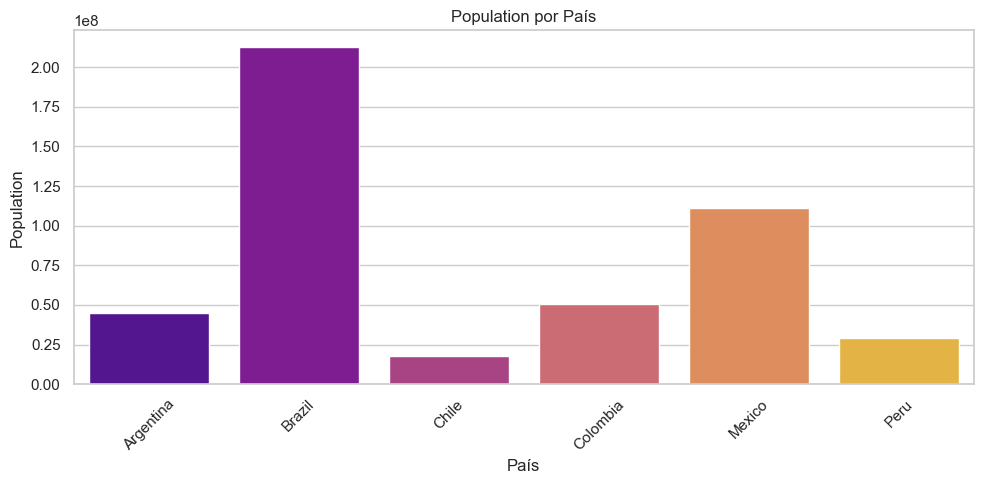

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


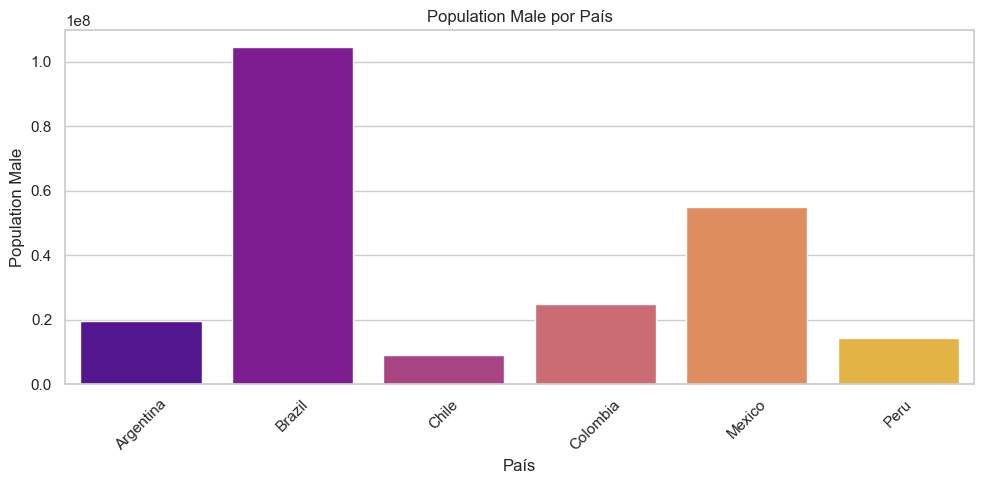

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


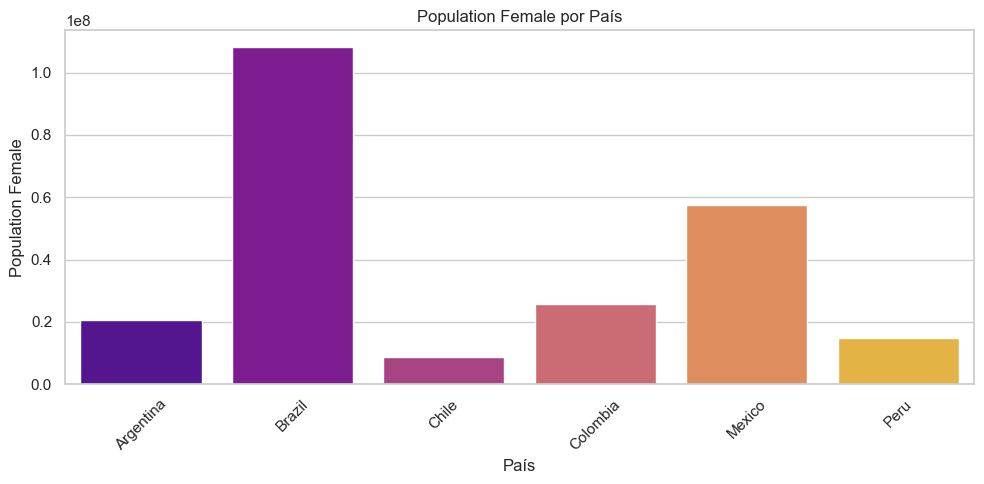

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


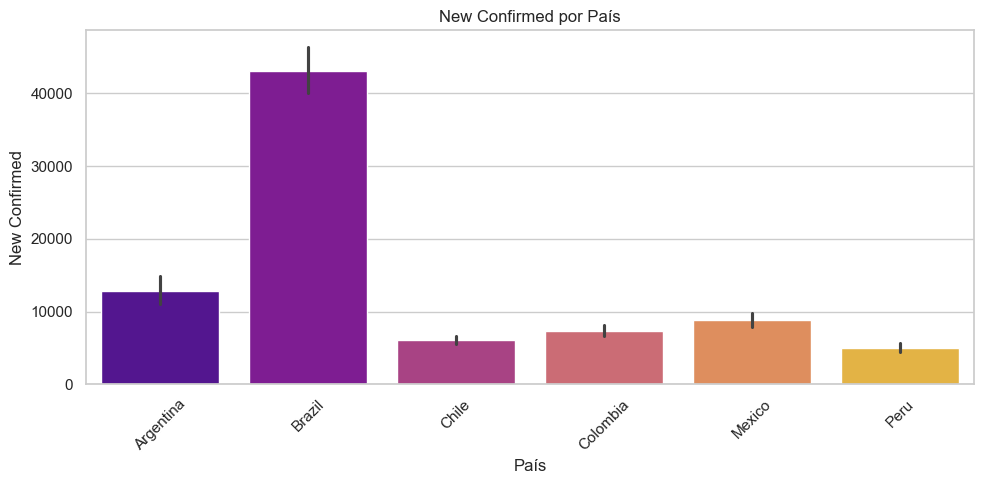

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


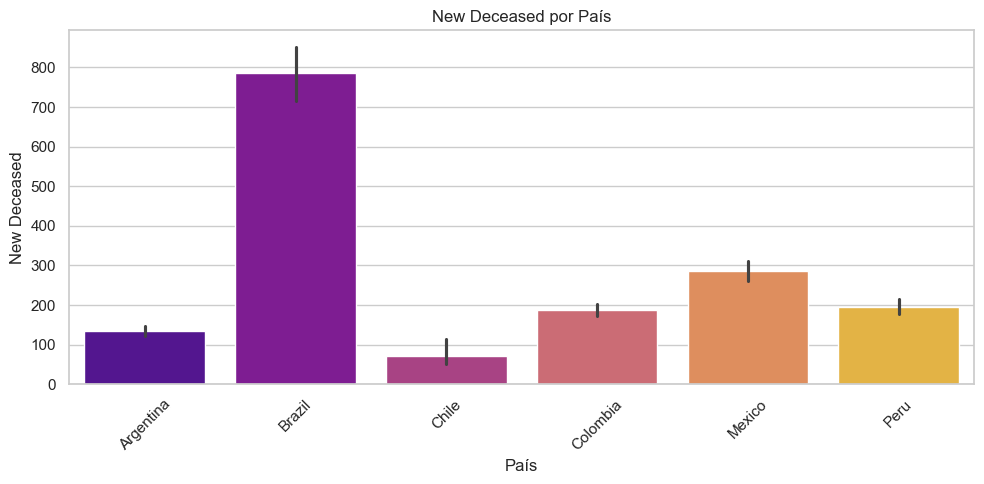

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


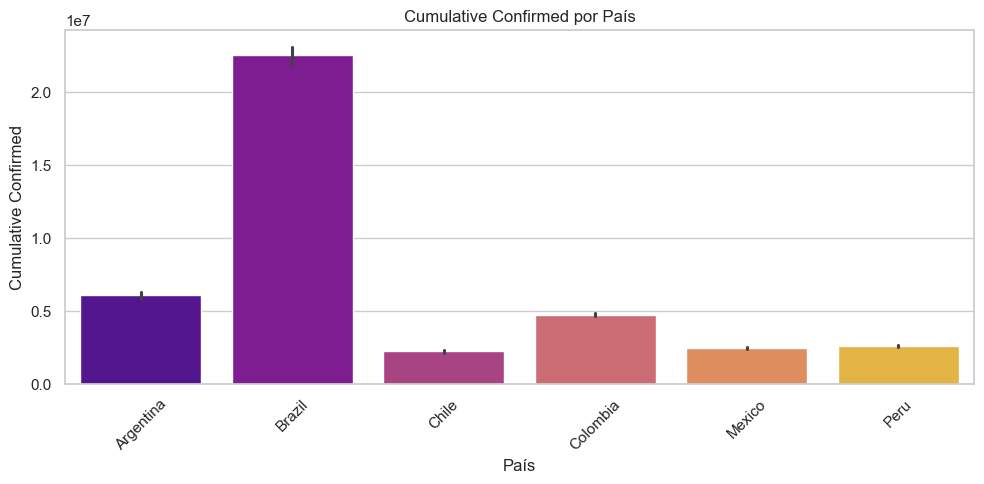

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


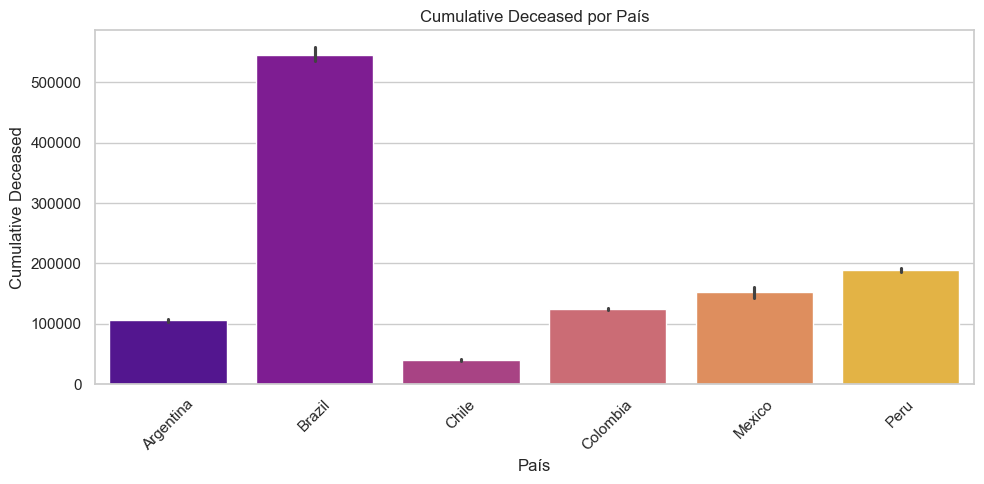

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


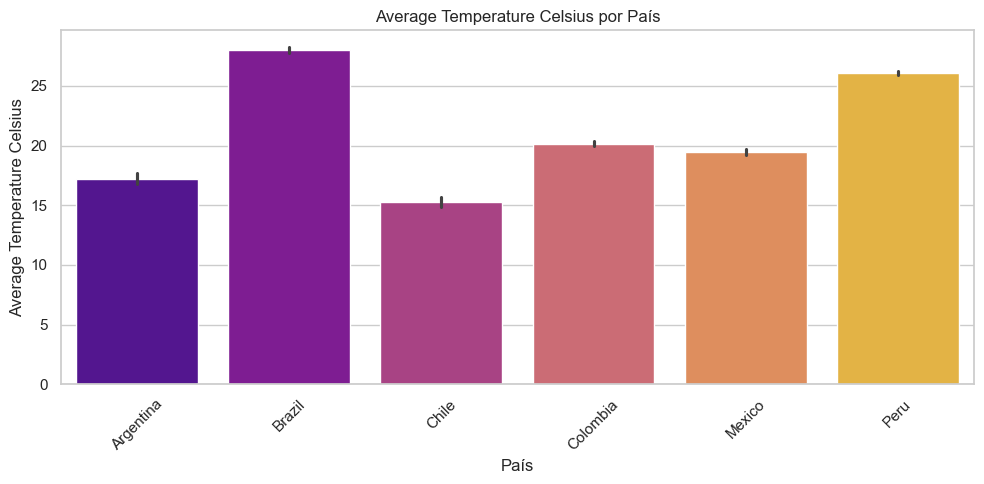

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


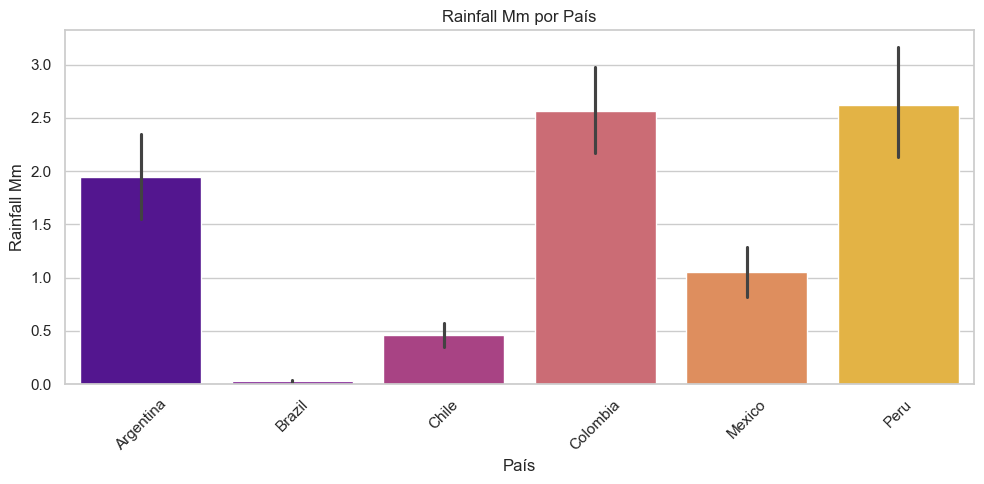

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\1568164980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')


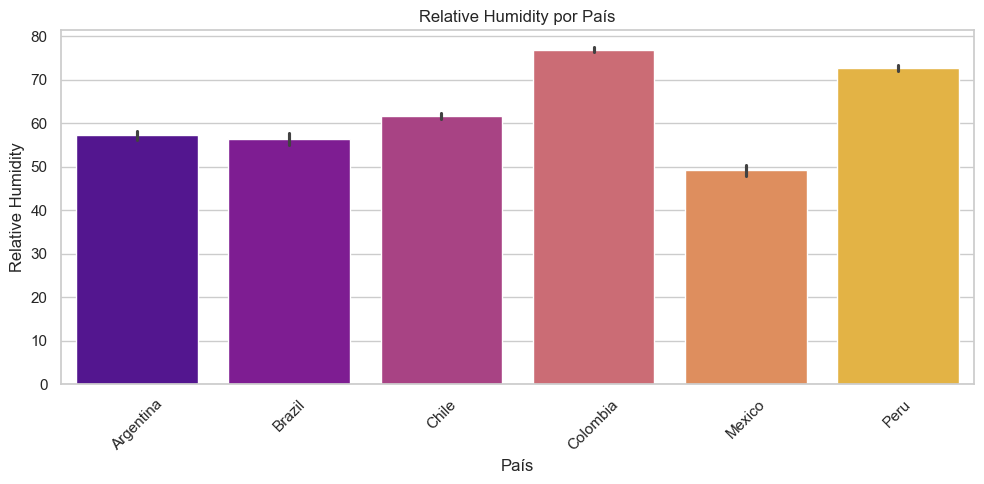

In [6]:
sns.set(style="whitegrid")

# 1. Gráficos de barras para cada variable
for variable in variables:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_latinoamerica, x='country_name', y=variable, palette='plasma')
    plt.xlabel('País')
    plt.ylabel(variable.replace('_', ' ').title())
    plt.title(f'{variable.replace("_", " ").title()} por País')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

---

*Histogramas y gráficos de densidad*

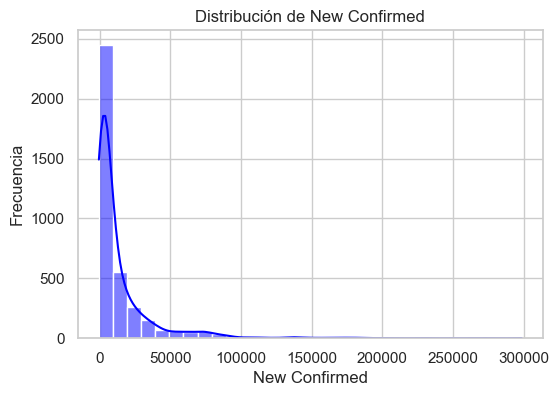

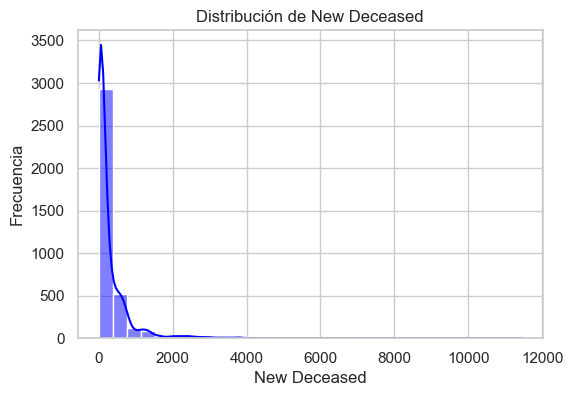

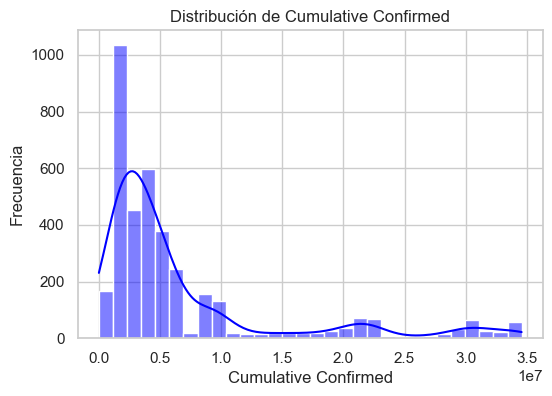

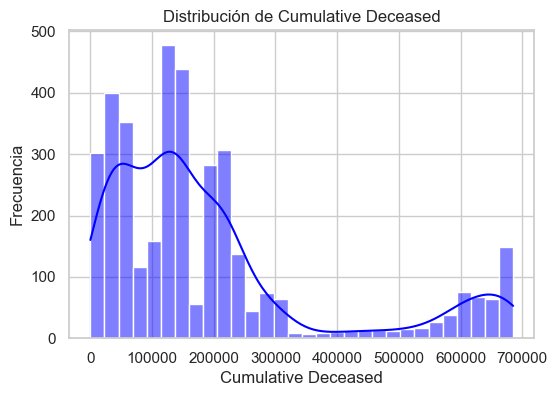

In [ ]:
for variable in ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_latinoamerica[variable], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {variable.replace("_", " ").title()}')
    plt.xlabel(variable.replace('_', ' ').title())
    plt.ylabel('Frecuencia')
    
    plt.show()

---

*Gráfico de dispersión de temperatura media contra casos confirmados*

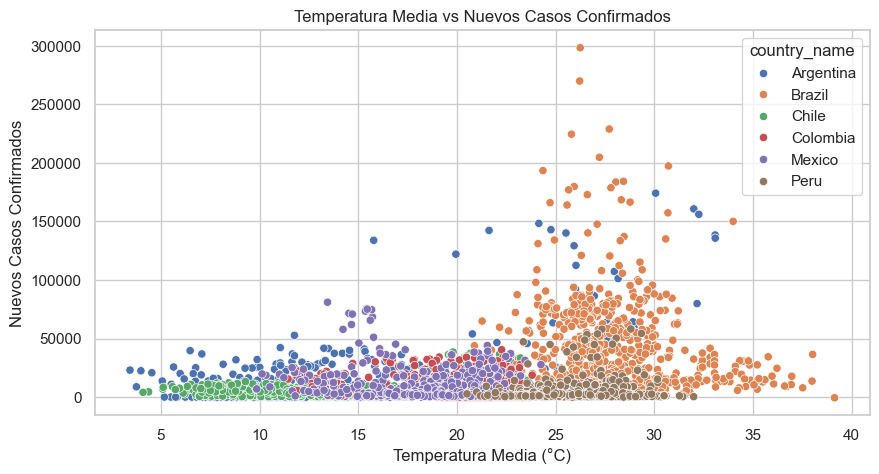

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_latinoamerica, x='average_temperature_celsius', y='new_confirmed', hue= 'country_name')
plt.title('Temperatura Media vs Nuevos Casos Confirmados')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Casos Confirmados')
plt.show()

---

*Gráfico de dispersión de temperatura media contra muertes confirmadas*

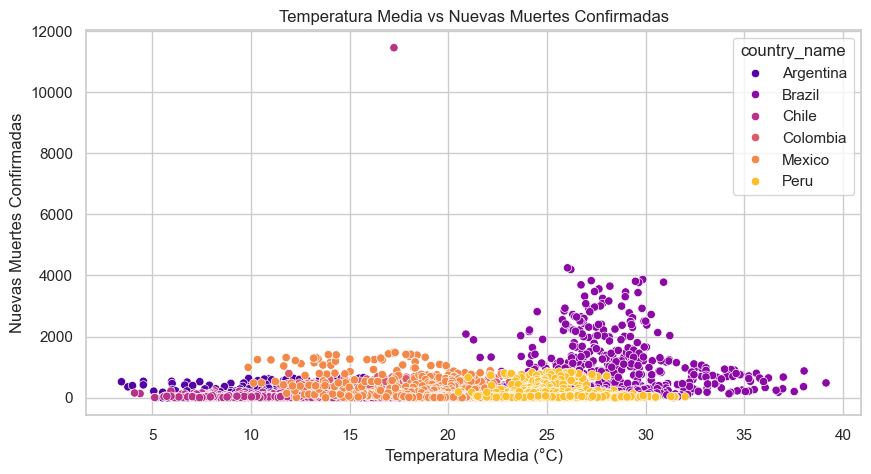

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_latinoamerica, x='average_temperature_celsius', y='new_deceased',palette='plasma', hue= 'country_name')
plt.title('Temperatura Media vs Nuevas Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevas Muertes Confirmadas')
plt.show()

---

*Boxplot de Temperatura Media*

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\4072319335.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




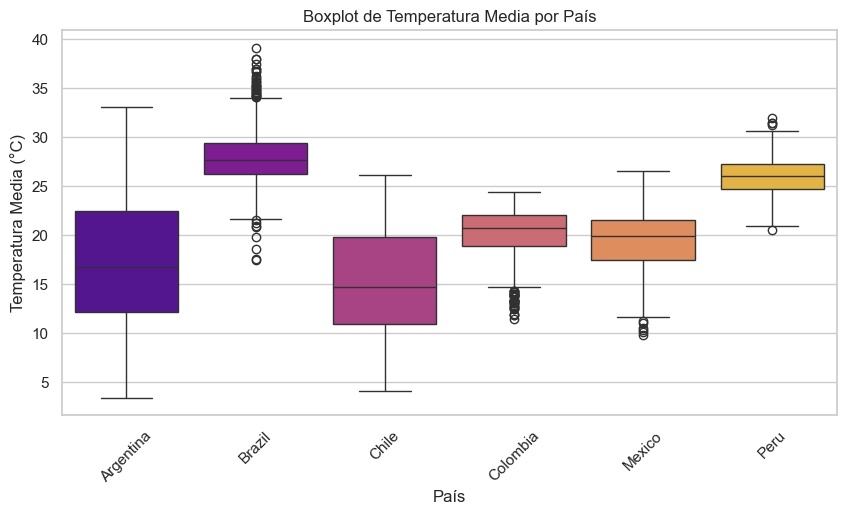

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_latinoamerica, x='country_name', y='average_temperature_celsius', palette='plasma')
plt.title('Boxplot de Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.xticks(rotation=45)
plt.show()

---

*Violinplot de Nuevos Casos Confirmados*

C:\Users\flore\AppData\Local\Temp\ipykernel_13976\3322336604.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




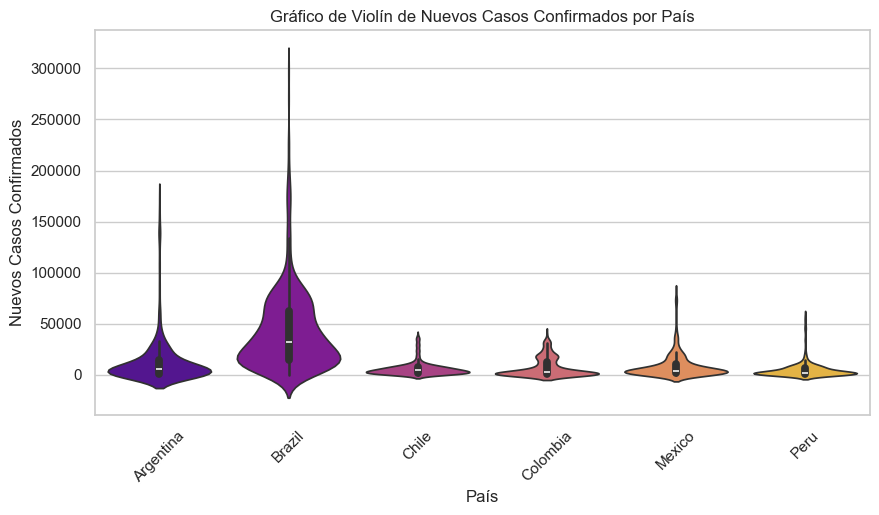

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_latinoamerica, x='country_name', y='new_confirmed', palette='plasma')
plt.title('Gráfico de Violín de Nuevos Casos Confirmados por País')
plt.xlabel('País')
plt.ylabel('Nuevos Casos Confirmados')
plt.xticks(rotation=45)
plt.show()

---

---